In [60]:
! pip install torch numpy pandas scikit-learn

# Training A Classification Model For Titanic Survivors

## Neural Network

We will first train a neural network to see how this works. See the notebook from Ch4 on the MNIST digit classifier for more details for a deeper discussion ([link](https://samikh-git.github.io/personal-website/content/ch4.html)). 

In [61]:
import os
from pathlib import Path

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: path = Path('../input/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

In [62]:
import pandas as pd, numpy as np
train_df = pd.read_csv("./titanic/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We need to pre process data. We have some columns that are undefined for certain passengers. 

In [63]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
modes = train_df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [65]:
train_df.fillna(modes, inplace = True)

Now we are sure that all of our items have data. No cells should be undefined.

In [66]:
train_df.describe(include=[np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The fare has a pretty large tail. We want to smoothen this distribution.


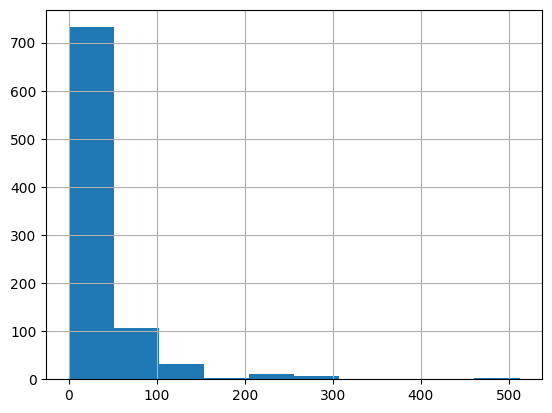

In [67]:
train_df["Fare"].hist()
print("The fare has a pretty large tail. We want to smoothen this distribution.")

We now have a nicer distribution that will be easier to work with.


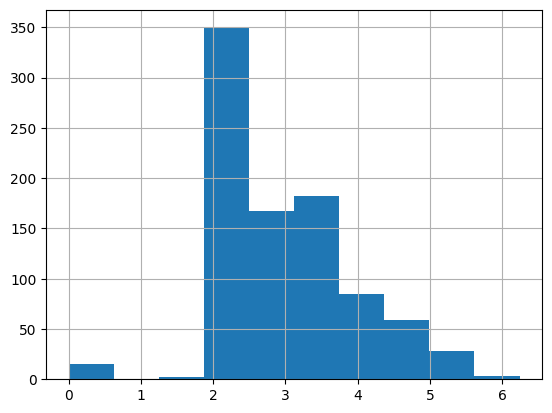

In [68]:
train_df["Fare"] = np.log(train_df["Fare"]+1)
train_df["Fare"].hist()
print("We now have a nicer distribution that will be easier to work with.")

In [69]:
train_df.describe(include = [object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [70]:
train_df = pd.get_dummies(train_df, columns=["Sex","Cabin","Embarked"],dtype=float)
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,2.110213,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,4.280593,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,2.188856,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,3.990834,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,2.202765,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


We will remove the name attribute as it is not particularly useful for our predictions.

In [71]:
train_df = train_df.drop(columns=["Name","Ticket"])
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,2.110213,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,38.0,1,0,4.280593,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,26.0,0,0,2.188856,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,1,1,35.0,1,0,3.990834,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,2.202765,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,2.639057,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,888,1,1,19.0,0,0,3.433987,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,889,0,3,24.0,1,2,3.196630,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889,890,1,1,26.0,0,0,3.433987,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [72]:
import torch
from torch import tensor

labels = tensor(train_df['Survived'], dtype = torch.long)
attributes = tensor(train_df.drop(columns=['Survived']).values, dtype= torch.float)

label_atts_map = list(zip(attributes, labels))

In [73]:
from torch.utils.data import random_split, DataLoader

train_size = int(len(label_atts_map)*0.8)
val_size = len(label_atts_map) - train_size

train, valid = random_split(label_atts_map, [train_size, val_size])

train_dl = DataLoader(train, batch_size = 64, shuffle = True)
valid_dl = DataLoader(train, batch_size = 64, shuffle = True)

In [74]:
xb, yb = next(iter(train_dl))
yb.shape

torch.Size([64])

In [75]:
import torch.nn as nn
import torch.optim as opt

model = nn.Sequential(
        nn.Linear(1*158,512),
        nn.ReLU(), 
        nn.Linear(512,256),
        nn.ReLU(),
        nn.Linear(256, 2),
)

learning_rate = 0.1

sgd = opt.SGD(model.parameters(), learning_rate)

loss_fn = nn.CrossEntropyLoss()

In [76]:
print("Parameters shape: ", next(model.parameters()).shape)

Parameters shape:  torch.Size([512, 158])


In [ ]:
def validation():
    accuracy = []
    for xb, yb in valid_dl:
        predictions = torch.argmax(model(xb))
        accuracy.append((predictions == yb).float().mean())
    return round(torch.stack(accuracy).float().mean().item(),4)


def train_epoch():
    epoch_loss = np.array([])
    for xb, yb in train_dl:
        sgd.zero_grad()
        predictions = model(xb)
        loss = loss_fn(predictions, yb)
        loss.backward()
        epoch_loss = np.append(epoch_loss, loss.item())
        sgd.step()
    return epoch_loss

for ep in range(10):
    mean_loss = round(np.mean(train_epoch()),4)
    accuracy = round(validation(),4)
    print(f"Epoch #{ep} || Mean Loss: {round(mean_loss,3)} || Accuracy: {round(accuracy,3)}")

Epoch #0 || Mean Loss: 6.036624138778486e+18 || Accuracy: 0.6276
Epoch #1 || Mean Loss: 4.1381 || Accuracy: 0.6185
Epoch #2 || Mean Loss: 0.6586 || Accuracy: 0.6185
Epoch #3 || Mean Loss: 0.6694 || Accuracy: 0.6367
Epoch #4 || Mean Loss: 0.6694 || Accuracy: 0.6185
Epoch #5 || Mean Loss: 0.6695 || Accuracy: 0.6185
Epoch #6 || Mean Loss: 0.6613 || Accuracy: 0.6094
Epoch #7 || Mean Loss: 0.6563 || Accuracy: 0.5911
Epoch #8 || Mean Loss: 0.6651 || Accuracy: 0.6276
Epoch #9 || Mean Loss: 0.6698 || Accuracy: 0.6185


## Random Forests


### Decision Trees

We will be building our decision tree using the sklearn library. Sklearn (also stylized as scikit-learn) is a Python library that is provides an API to easily create machine learning models. 

Decision Trees try to split our dataset recursively until we reach a stop condition. The Decision Tree decides to make its splits in the following way.

1. Go through each column in our dataset
2. For each column, go through each possible level in that column (choose each possible value in that column)
3. Try splitting the data into two groups based on each level (our binary split)
4. Find the average value of the target for both groups. 
5. Compare this average value to the actual target value for each individual in each group. 
6. After looping through all of the columns and all of the possible levels in each column, choose the split that provided the best prediction found in the previous step.
7. Repeat this process with our two subgroups. Stop until we reach our stop condition (ie max depth, min number of individuals per group). 

### Preprocessing our data

Similarly to our neural network, we need to preprocess our data before being able to use it for our model.

In [78]:
train_df = pd.read_csv("./titanic/train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [79]:
def proc_data(df):
    df['Fare'] = df['Fare'].fillna(0)
    df.fillna(modes, inplace=True)
    df['LogFare'] = np.log1p(df['Fare'])
    df['Embarked'] = pd.Categorical(df['Embarked'])
    df['Sex'] = pd.Categorical(df['Sex'])

proc_data(train_df)

The  ```pd.Categorical``` method will replace in the background the categorical variable with a code. 

Let us now define our categorical and continuous variables that will be of interest and replace our categorical variables with their code.

In [80]:
categoricals = ['Sex', 'Embarked']
continous = ['Age', 'SibSp', 'Parch', 'LogFare', 'Pclass']

dependent = 'Survived'

train_df[categoricals] = train_df[categoricals].apply(lambda x: x.cat.codes)

In [81]:
from numpy import random
from sklearn.model_selection import train_test_split

random.seed(42) # define our random seed to help make this repeatable

trn_df, val_df = train_test_split(train_df, test_size = 0.25)

def split_target_input(df):
    xs = df[categoricals+continous].copy()
    return xs, df[dependent]

trn_xs, trn_y = split_target_input(trn_df)
val_xs, val_y = split_target_input(val_df)

### Training Our Decision Tree

In [82]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree = DecisionTreeClassifier(max_leaf_nodes = 4).fit(trn_xs, trn_y)

A graph of our decision tree


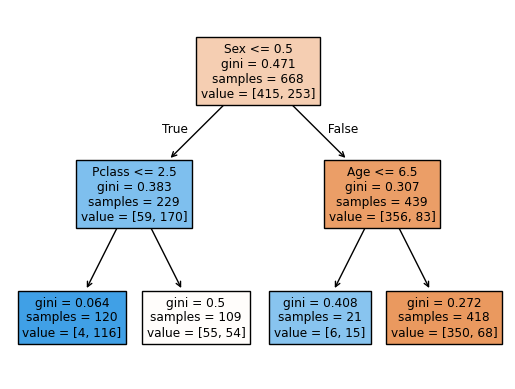

In [83]:
plot_tree(tree, feature_names = trn_xs.columns, filled=True)
print("A graph of our decision tree")

The *gini*score is a measure of the impurity of our groups. The lower the *gini* the more dissimilar each individual in each group is. 

In [84]:
#Our metrics function
def mean_square_error(predictions, targets):
    return np.mean((predictions-targets)**2).item()

In [85]:
mean_square_error(tree.predict(val_xs), val_y)

0.2242152466367713

### Bagging + Random Forests

Bagging is a technique developed by Leo Breiman (a UC Berkeley professor; go bears!) that consists of taking a bunch of different models that are trained on bootstraps of our data (random selections of our training data). We then use each model to make a prediction and then take the average of those predictions. 

The idea behind this method is that each model is independent of each other. Therefore there errors will be independent of each other and when averaged out they should tend to zero. 

A great feature of random forests is that it is not possible to overfit a random forest as each model is independent of each other. 

A random forest is the bagging of decision trees. Random Forests and Bagging more generally are an example of ensembling.

In [86]:
# A function that defines a bootstrapped tree

def get_tree(prop=0.75):
    length = len(trn_y)
    idxs = random.choice(length, int(length*prop)) # returns random indices to look at
    return DecisionTreeClassifier(min_samples_leaf = 5).fit(trn_xs.iloc[idxs], trn_y.iloc[idxs])

In [89]:
def random_forest(xs, length=100):
    preds = np.stack([get_tree().predict(xs) for _ in np.arange(length)])
    return np.mean(preds, 0)

In [91]:
preds = random_forest(val_xs)
mean_square_error(preds, val_y)

0.13712600896860988

In [94]:
# using sklearn
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100, min_samples_leaf = 5)
rf.fit(trn_xs, trn_y)
mean_square_error(rf.predict(val_xs), val_y)


0.18385650224215247

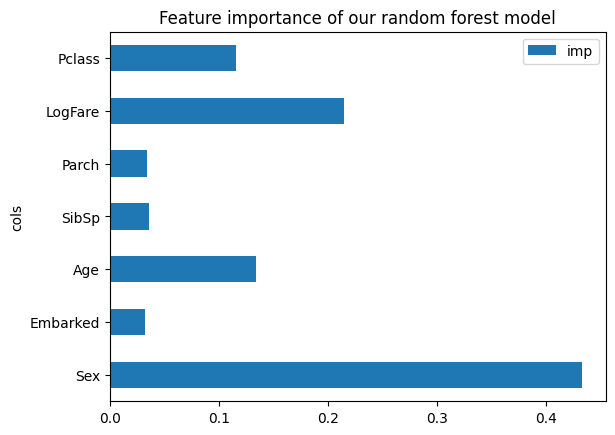

In [98]:
title = "Feature importance of our random forest model"
plt = pd.DataFrame(dict(cols=trn_xs.columns, imp=rf.feature_importances_)).plot('cols', 'imp', 'barh', title = title)

Here above is one of the great features of Decision Trees / Random Forests. We are able to see the relative importance of each feature in making a prediction. 

### Gradient Boosting Machine

This is another type of ensembling technique for random forests. Instead of averaging out the predicitons, each prediction is summed. This is called *boosting*.

Gradient Boosting Machine are prone to overfitting apparently for no apparently reason. 